In [ ]:
!pip install PyDrive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/EVCanada.csv'
df = pd.read_csv(file_path)
print(df.head())


  Incentive Request Date Month and Year   \
0             2019-05-15        May 2019   
1             2019-05-16        May 2019   
2             2019-05-16        May 2019   
3             2019-05-16        May 2019   
4             2019-05-16        May 2019   

  Government of Canada Fiscal Year (FY)  Calendar Year  \
0                               2019-20           2019   
1                               2019-20           2019   
2                               2019-20           2019   
3                               2019-20           2019   
4                               2019-20           2019   

  Dealership Province / Territory  Dealership Postal Code Purchase or Lease  \
0                 British Columbia                V5C 0J4          Purchase   
1                           Quebec                G3M 1W1          Purchase   
2                           Quebec                G3M 1W1          Purchase   
3                           Quebec                G3M 1W1          Pur

In [ ]:
min_value = df['Vehicle Year'].min()

print("Minimum Value:", min_value)
max_value = df['Vehicle Year'].max()

print("Maximum Value:", max_value)

Minimum Value: 2017
Maximum Value: 2023


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202206 entries, 0 to 202205
Data columns (total 19 columns):
 #   Column                                                                                                                                                      Non-Null Count   Dtype  
---  ------                                                                                                                                                      --------------   -----  
 0   Incentive Request Date                                                                                                                                      202206 non-null  object 
 1   Month and Year                                                                                                                                              202206 non-null  object 
 2   Government of Canada Fiscal Year (FY)                                                                                                       

In [ ]:
print('Nunavut' in df['Recipient Province / Territory '].values)

True


In [ ]:
df=df[df['Recipient Province / Territory '] != 'Nunavut']

In [ ]:
df=df.drop("Unnamed: 18", axis=1)


In [ ]:
for column in df.columns:
    mode_value = df[column].mode()[0]  # Calculate mode
    df[column].fillna(mode_value, inplace=True)  # Replace missing values with mode

print("\nDataFrame After Replacing Missing Values:")
print(df)

<ipython-input-9-71450cfd9bc9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)  # Replace missing values with mode
<ipython-input-9-71450cfd9bc9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va


DataFrame After Replacing Missing Values:
       Incentive Request Date Month and Year   \
0                  2019-05-15        May 2019   
1                  2019-05-16        May 2019   
2                  2019-05-16        May 2019   
3                  2019-05-16        May 2019   
4                  2019-05-16        May 2019   
...                       ...             ...   
202201             2023-03-31      March 2023   
202202             2023-03-31      March 2023   
202203             2023-03-31      March 2023   
202204             2023-03-31      March 2023   
202205             2023-03-31      March 2023   

       Government of Canada Fiscal Year (FY)  Calendar Year  \
0                                    2019-20           2019   
1                                    2019-20           2019   
2                                    2019-20           2019   
3                                    2019-20           2019   
4                                    2019-20         

In [ ]:
df.describe()

,Calendar Year,Vehicle Year
count,202205.000000,202205.000000
mean,2020.932405,2020.994629
std,1.218336,1.284669
min,2019.000000,2017.000000
25%,2020.000000,2020.000000
50%,2021.000000,2021.000000
75%,2022.000000,2022.000000
max,2023.000000,2023.000000


In [ ]:
grouped_data = df.groupby('Vehicle Year')['Vehicle Make & Model'].count().reset_index()
grouped_data

,Vehicle Year,Vehicle Make & Model
0,2017,24
1,2018,1799
2,2019,28249
3,2020,46247
4,2021,44108
5,2022,56404
6,2023,25374


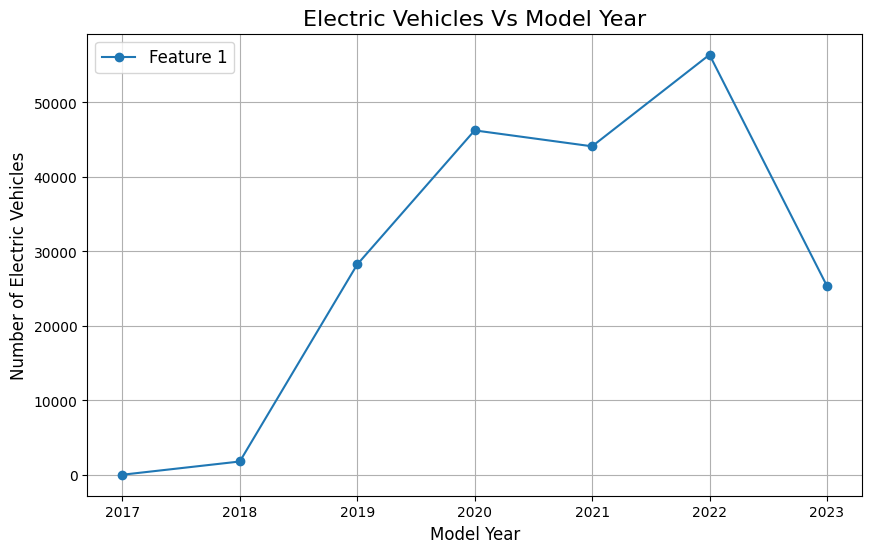

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Vehicle Year'], grouped_data['Vehicle Make & Model'], label='Feature 1', marker='o')

# Customize the plot
plt.title('Electric Vehicles Vs Model Year', fontsize=16)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Number of Electric Vehicles', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
print(df.columns)
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

Index(['Incentive Request Date', 'Month and Year ',
       'Government of Canada Fiscal Year (FY)', 'Calendar Year',
       'Dealership Province / Territory ', 'Dealership Postal Code',
       'Purchase or Lease', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model',
       'Vehicle Make & Model',
       'Battery-Electric Vehicle (BEV), Plug-in Hybrid Electric Vehicle (PHEV) or Fuel Cell Electric Vehicle (FCEV)',
       'BEV/PHEV/FCEV - Battery equal to or greater than 15 kWh or \nElectric range equal to or greater than 50 km',
       'BEV, PHEV  ? 15 kWh or PHEV < 15 kWh (until April 24, 2022) \nand\nPHEV ?  50 km or PHEV < 50 km and  FCEVs ? 50 km or FCEVs < 50 km\n(April 25, 2022 onward)',
       'Eligible Incentive Amount', 'Individual or Organization \n(Recipient)',
       'Recipient Province / Territory ', 'Country'],
      dtype='object')


In [ ]:
Territory = df['Recipient Province / Territory'].unique()
Territory

array(['British Columbia', 'Quebec', 'Ontario', 'Manitoba',
       'New Brunswick', 'Saskatchewan', 'Nova Scotia', 'Alberta',
       'Prince Edward Island', 'Yukon', 'Newfoundland and Labrador',
       'Northwest Territories'], dtype=object)

In [ ]:
Make_Vehiv = df['Vehicle Make'].unique()
Make_Vehiv

array(['Volkswagen', 'Nissan', 'Hyundai', 'Toyota', 'Chevrolet', 'Ford',
       'Chrysler', 'Kia', 'Honda', 'Mitsubishi', 'MINI', 'smart', 'Tesla',
       'Audi', 'BMW', 'Subaru', 'Mazda', 'Jeep', 'Lincoln', 'Polestar',
       'Lexus', 'Volvo'], dtype=object)

In [ ]:
Model_Vehicless = df['Vehicle Model'].unique()
Model_Vehicless

array(['e-Golf', 'Leaf', 'Ioniq electric', 'Prius Prime', 'Bolt',
       'Fusion Energi', 'Pacifica Hybrid', 'Soul EV', 'Optima PHEV',
       'Ioniq electric Plus', 'Volt', 'Kona Electric', 'Niro EV',
       'Clarity Plug-in Hybrid', 'Outlander PHEV', 'Sonata PHEV',
       'Countryman', 'fortwo electric drive cabriolet', 'Ioniq PHEV',
       'Focus', 'Niro PHEV', 'Model 3', 'A3 Sportback e-tron',
       'Leaf Plus', 'EQ fortwo coupe', 'fortwo electric drive coupe',
       'EQ fortwo cabriolet', 'i3', 'Ioniq Plug-In hybrid',
       'Crosstrek Plug-In Hybrid', 'Escape PHEV', 'Cooper SE 3 Door',
       '330e', 'RAV4 Prime', 'i-MiEV', '3 Door', 'Bolt EUV',
       'Santa Fe PHEV', 'Tucson PHEV', 'Sorento PHEV', 'MX-30', 'ID.4',
       'IONIQ 5', 'EV6', '*Escape PHEV', '*Tucson PHEV', 'Wrangler 4xe',
       'X3', '*Santa Fe PHEV', 'Mach E', 'Corsair', '*Sorento PHEV', '2',
       'NX 450h+', 'i4', 'XC40 Recharge', 'Countryman All4',
       '3 Door Hatch', 'Mirai', 'V60 Recharge', 'Q4 e-tron 

In [ ]:
grouped_region = df.groupby('Calendar Year')['Recipient Province / Territory'].count().reset_index()
grouped_region

,Calendar Year,Recipient Province / Territory
0,2019,33611
1,2020,39020
2,2021,54513
3,2022,57548
4,2023,17513


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])
df.head()

,Incentive Request Date,Month and Year,Government of Canada Fiscal Year (FY),Calendar Year,Dealership Province / Territory,Dealership Postal Code,Purchase or Lease,Vehicle Year,Vehicle Make,Vehicle Model,Vehicle Make & Model,"Battery-Electric Vehicle (BEV), Plug-in Hybrid Electric Vehicle (PHEV) or Fuel Cell Electric Vehicle (FCEV)",BEV/PHEV/FCEV - Battery equal to or greater than 15 kWh or \nElectric range equal to or greater than 50 km,"BEV, PHEV ? 15 kWh or PHEV < 15 kWh (until April 24, 2022) \nand\nPHEV ? 50 km or PHEV < 50 km and FCEVs ? 50 km or FCEVs < 50 km\n(April 25, 2022 onward)",Eligible Incentive Amount,Individual or Organization \n(Recipient),Recipient Province / Territory,Country
0,0,31,0,2019,1,1772,1,2019,19,64,60,0,1,0,16,0,1,0
1,1,31,0,2019,9,210,1,2019,14,33,49,0,1,0,16,0,9,0
2,1,31,0,2019,9,210,1,2019,14,33,49,0,1,0,16,0,9,0
3,1,31,0,2019,9,210,1,2019,14,33,49,0,1,0,16,0,9,0
4,1,31,0,2019,9,710,1,2019,6,30,23,0,1,0,16,0,9,0


In [ ]:
scaler = MinMaxScaler()

# Scale Only Numerical Columns
numerical_cols = ['Calendar Year','Vehicle Year']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df)


        Incentive Request Date  Month and Year  \
0                            0              31   
1                            1              31   
2                            1              31   
3                            1              31   
4                            1              31   
...                        ...             ...   
202201                    1396              30   
202202                    1396              30   
202203                    1396              30   
202204                    1396              30   
202205                    1396              30   

        Government of Canada Fiscal Year (FY)  Calendar Year  \
0                                           0            0.0   
1                                           0            0.0   
2                                           0            0.0   
3                                           0            0.0   
4                                           0            0.0   
...            

In [ ]:
X= df.drop('Recipient Province / Territory', axis=1)
y= df['Recipient Province / Territory']

In [ ]:
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=250,  # Number of trees
    max_depth=5,    # No limit on tree depth
    random_state=42    # Seed for reproducibility
)

# Train the model
rf_model.fit(X_train_oversampled, y_train_oversampled)

# Predict on test data
y_pred = rf_model.predict(X_test)





In [ ]:

accuracyrf = accuracy_score(y_test, y_pred)
print(f"Accuracy on Original Data: {accuracyrf:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)



Accuracy on Original Data: 0.78
Confusion Matrix:
[[  577   394     0    89     0   133     0    26     0     1     8     0]
 [ 2107 11606    17   728     0  1998     1    40     0     0     2     2]
 [    2    63   290     2     0     4     0     5     0     0     5     0]
 [    0    41     0   309     0     0    10     0     0     4     0     0]
 [    0    16     0     0   142     0     1     2     1     3     0     0]
 [    5     3     0     0     0     1     0     0     0     0     1     0]
 [    1    64     0     3     1     0   387     1     2     1     0     0]
 [    3  2924    11     0     0     1     1  5761     0    48     3     0]
 [    0    11     0     3     0     0     1     2   131     0     0     0]
 [    0  4102     1     7     0     2     1   433     1 27832     0     0]
 [   10    37     0     2     0     3     0     0     0     0   177     0]
 [    1     4     0     0     0     1     0     0     0     0     0    49]]
Classification Report:
              precision   

In [ ]:
import numpy as np

# Assuming y is your target variable
classes, counts = np.unique(y, return_counts=True)
print(f"Classes: {classes}")
print(f"Counts: {counts}")



Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Counts: [  4036  54542   1197   1174    520     24   1547  29256    486 108528
    735    160]


In [ ]:
import numpy as np

# Assuming y is your target variable
classes, counts_ = np.unique(y_train_oversampled, return_counts=True)
print(f"Classes: {classes}")
print(f"Counts: {counts}")


Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Counts: [  4036  54542   1197   1174    520     24   1547  29256    486 108528
    735    160]


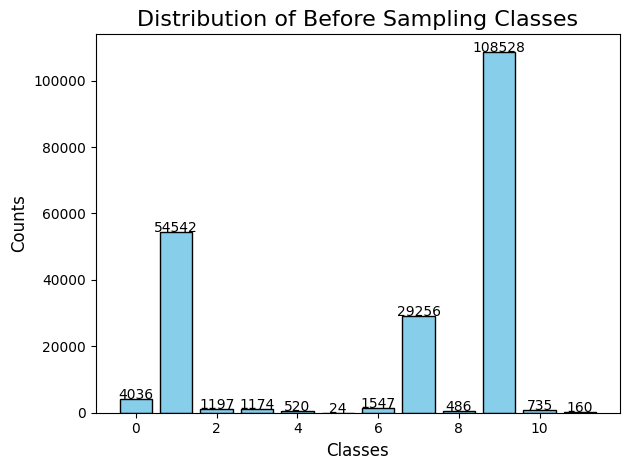

In [ ]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.bar(classes, counts, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Before Sampling Classes', fontsize=16)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Counts', fontsize=12)

# Displaying the values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


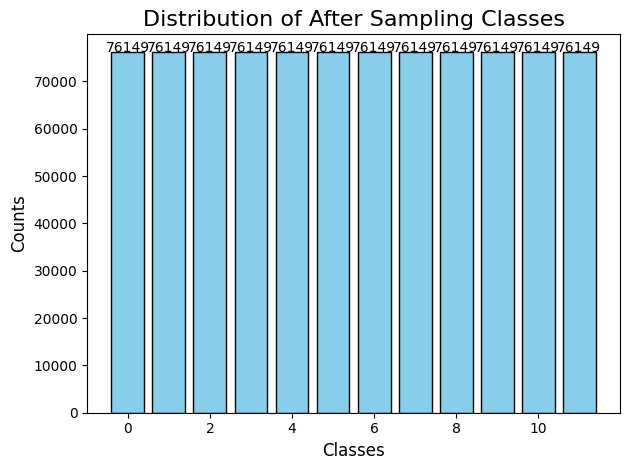

In [ ]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.bar(classes, counts_, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of After Sampling Classes', fontsize=16)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Counts', fontsize=12)

# Displaying the values on top of the bars
for i, count in enumerate(counts_):
    plt.text(i, count + 1, str(count), ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB
# Initialize the model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_oversampled, y_train_oversampled)
# Predict on test data
y_pred = nb_model.predict(X_test)



In [ ]:
# Accuracy Score
accuracynb = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracynb:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.51
Confusion Matrix:
[[  852   302     1     0     0    14     0    35     0    14     8     2]
 [  979 14175    44     0     0   819     0     4     0     2     2   476]
 [    2    62   279     1     0     0     1     6     0    14     6     0]
 [    0    41     0   241    41     0     3     0     8    30     0     0]
 [    0    16     0    11   109     0    11     0     3    14     1     0]
 [    6     1     0     0     0     0     0     1     0     0     1     1]
 [    0    64     0     3     1     0   180     1   171    40     0     0]
 [    1  3219    11     0     0     1  2408   581   462  1605   462     2]
 [    0    11     0     1     0     0    35     1    77    23     0     0]
 [    2  4402     1     5     2     0  1226    14 12303 14422     2     0]
 [   14    37     0     0     0     0     0     0     0    14   163     1]
 [    1     5     0     0     0     0     0     0     0     8     0    41]]
Classification Report:
              precision    recall  f1-score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_model = KNeighborsClassifier(
    n_neighbors=5,   # Number of neighbors
    metric='minkowski',  # Distance metric (default: Euclidean distance)
    p=2  # Power parameter for Minkowski metric (p=2 is Euclidean)
)

# Train the model
knn_model.fit(X_train_oversampled, y_train_oversampled)


KNeighborsClassifier()

In [ ]:
# Predict on test data
y_pred = knn_model.predict(X_test)

# Accuracy Score
accuracykn = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracykn:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.86
Confusion Matrix:
[[  898   124    10     0     1    12     8    54     0    62    32    27]
 [  152 14202    12     8     7    55    31   892     0   987    41   114]
 [   18    17   292     2     0     1     2    22     0     8     7     2]
 [    2    12     1   292     1     0    17    10    10    19     0     0]
 [    1     6     0     1   135     0     8     6     1     6     1     0]
 [    6     0     0     0     0     1     0     0     0     1     1     1]
 [    1    16     1    16    13     0   361    18    11    22     1     0]
 [   58  1149    36     7    22     1    25  6642     1   776    16    19]
 [    1     2     1    21     2     0    10     5   106     0     0     0]
 [   55  1527     4   108    28     2    21  1401    26 29191     3    13]
 [   25    16    11     0     0     1     2     5     0     7   160     2]
 [    0    14     0     0     0     1     0     0     0     1     0    39]]
Classification Report:
              precision    recall  f1-score

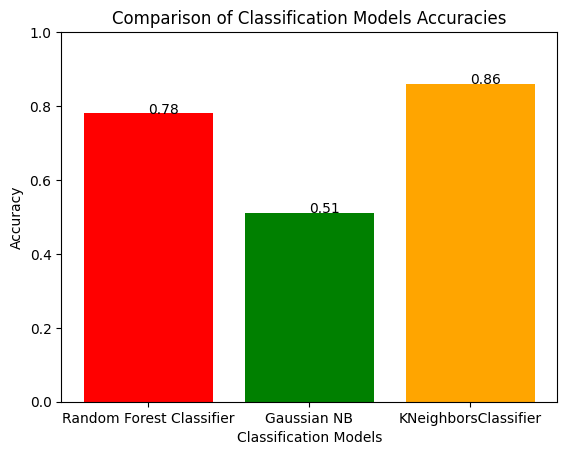

In [ ]:
models = ['Random Forest Classifier', 'Gaussian NB', 'KNeighborsClassifier']
accuracies = [round(accuracyrf,2), round(accuracynb,2), round(accuracykn,2)]  # Accuracy scores
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
colors = ['red', 'green', 'orange']
# Plot the histogram
plt.bar(models, accuracies, color=colors)
addlabels(models, accuracies)
plt.ylim(0, 1)  # Accuracy range (0 to 1)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Models Accuracies')
plt.show()

In [ ]:
file_path = '/content/drive/MyDrive/CO2_Emissions_Canada.csv'
df1 = pd.read_csv(file_path)
print(df1.head())
df1.info()


    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

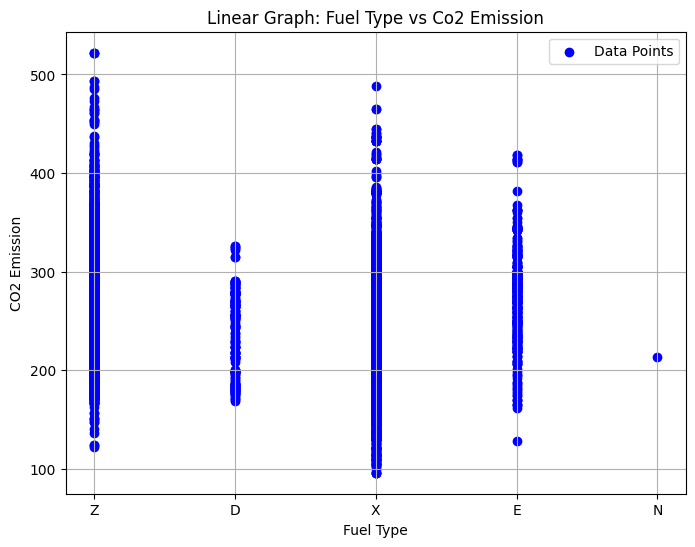

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df1['Fuel Type'], df1['CO2 Emissions(g/km)'], color='blue', label='Data Points')
plt.title('Linear Graph: Fuel Type vs Co2 Emission')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emission')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Make_Vehicle = df1['Make'].unique()
Make_Vehicle


array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [ ]:
Fuel = df1['Fuel Type'].unique()
Fuel

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [ ]:
Model_Vehicle= df1['Model'].unique()
Model_Vehicle

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

In [ ]:
df1.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
grouped_make = df1.groupby('Make')['CO2 Emissions(g/km)'].count().reset_index()
grouped_make

,Make,CO2 Emissions(g/km)
0,ACURA,72
1,ALFA ROMEO,30
2,ASTON MARTIN,47
3,AUDI,286
4,BENTLEY,46
5,BMW,527
6,BUGATTI,3
7,BUICK,103
8,CADILLAC,158
9,CHEVROLET,588


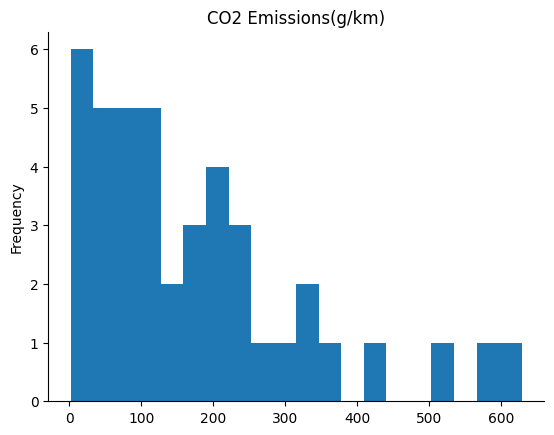

In [ ]:
from matplotlib import pyplot as plt
grouped_make['CO2 Emissions(g/km)'].plot(kind='hist', bins=20, title='CO2 Emissions(g/km)')
plt.gca().spines[['top', 'right',]].set_visible(False)

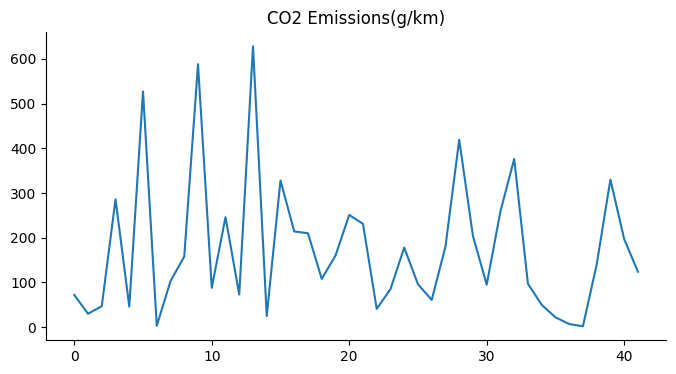

In [ ]:
# @title CO2 Emissions(g/km)

from matplotlib import pyplot as plt
grouped_make['CO2 Emissions(g/km)'].plot(kind='line', figsize=(8, 4), title='CO2 Emissions(g/km)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Extract Columns to Encode
columns_to_encode = ['Make', 'Model','Vehicle Class','Transmission','Fuel Type']

#categorical_cols = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in columns_to_encode:
    df1[col] = encoder.fit_transform(df1[col])
df1.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244


In [ ]:
df1

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,41,1951,11,2.0,4,17,4,10.7,7.7,9.4,30,219
7381,41,1957,11,2.0,4,17,4,11.2,8.3,9.9,29,232
7382,41,1960,11,2.0,4,17,4,11.7,8.6,10.3,27,240
7383,41,1968,12,2.0,4,17,4,11.2,8.3,9.9,29,232


In [ ]:
# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Scale Only Numerical Columns
numerical_cols = ['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)',
                  'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])

print(df1)


      Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0        0   1057              0        0.146667   0.076923            14   
1        0   1057              0        0.200000   0.076923            25   
2        0   1058              0        0.080000   0.076923            22   
3        0   1233             11        0.346667   0.230769            15   
4        0   1499             11        0.346667   0.230769            15   
...    ...    ...            ...             ...        ...           ...   
7380    41   1951             11        0.146667   0.076923            17   
7381    41   1957             11        0.146667   0.076923            17   
7382    41   1960             11        0.146667   0.076923            17   
7383    41   1968             12        0.146667   0.076923            17   
7384    41   1969             12        0.146667   0.076923            17   

      Fuel Type  Fuel Consumption City (L/100 km)  \
0             4       

In [ ]:
X= df1.drop('CO2 Emissions(g/km)', axis=1)
y= df1['CO2 Emissions(g/km)']

In [ ]:
from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svr_model = SVR(kernel='rbf', C=150, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse1 = mean_squared_error(y_test, y_pred)
mae1 = mean_absolute_error(y_test, y_pred)
r21 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse1:.2f}")
print(f"Mean Absolute Error: {mae1:.2f}")
print(f"R-squared Score: {r21:.2f}")


Mean Squared Error: 0.01
Mean Absolute Error: 0.07
R-squared Score: 0.65


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=1000,    # Number of trees in the forest
    max_depth=10,        # Maximum depth of each tree
    random_state=42      # Seed for reproducibility
)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=42)

In [ ]:
# Predict on the test data
y_pred = rf_model.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred)
mae2 = mean_absolute_error(y_test, y_pred)
r22 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse2:.2f}")
print(f"Mean Absolute Error (MAE): {mae2:.2f}")
print(f"R-Squared (R2): {r22:.2f}")


Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.00
R-Squared (R2): 1.00


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(
    n_estimators=500,    # Number of boosting stages
    learning_rate=0.1,   # Learning rate (smaller values require more estimators)
    max_depth=3,         # Maximum depth of individual estimators
    random_state=42      # Seed for reproducibility
)

# Train the model
gbr_model.fit(X_train, y_train)
# Predict on the test data
y_pred = gbr_model.predict(X_test)
mse3 = mean_squared_error(y_test, y_pred)
mae3 = mean_absolute_error(y_test, y_pred)
r23 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse3:.2f}")
print(f"Mean Absolute Error (MAE): {mae3:.2f}")
print(f"R-Squared (R2): {r23:.2f}")

Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.00
R-Squared (R2): 1.00


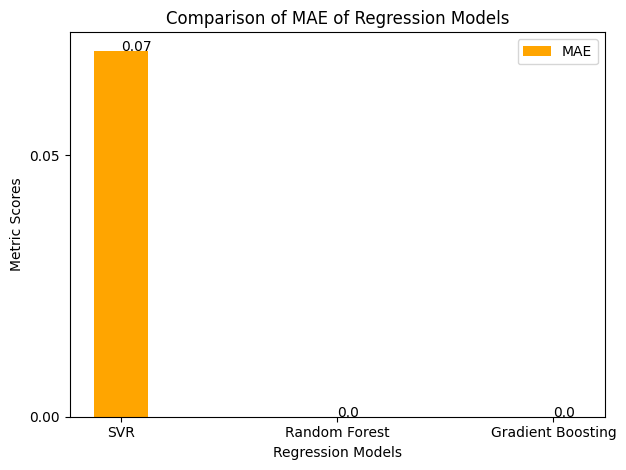

In [ ]:

models = ['SVR', 'Random Forest', 'Gradient Boosting']
# R² scores
mae_scores = [round(mae1,2), round(mae2,2), round(mae3, 2)]    #  MAE values   #  MSE values

# Creating a grouped bar chart
x = np.arange(len(models))  # Model indices
width = 0.25  # Width of each bar

# Plot bars

plt.bar(x, mae_scores, width, label='MAE', color='orange')


# Adding labels and title


addlabels(models,mae_scores)
plt.xlabel('Regression Models')
plt.ylabel('Metric Scores')
plt.title('Comparison of MAE of Regression Models')
plt.xticks(x, models)  # Model names on x-axis
plt.legend()
plt.yticks(np.arange(0, 0.1 ,0.05))
# Show plot
plt.tight_layout()
plt.show()


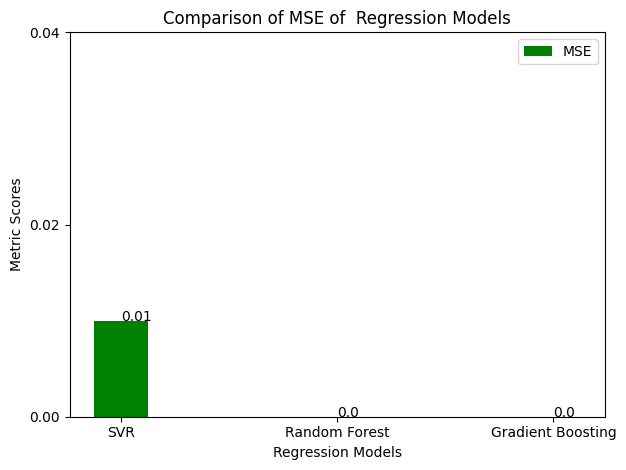

In [ ]:
Mmse_scores = [round(mse1,2), round(mse2,2), round(mse3,2)]    #  MSE values
plt.bar(x , mse_scores, width, label='MSE', color='green')
addlabels(models,mse_scores)

plt.xlabel('Regression Models')
plt.ylabel('Metric Scores')
plt.title('Comparison of MSE of  Regression Models')
plt.xticks(x, models)  # Model names on x-axis
plt.legend()
plt.yticks(np.arange(0, 0.05,0.02))
# Show plot
plt.tight_layout()
plt.show()


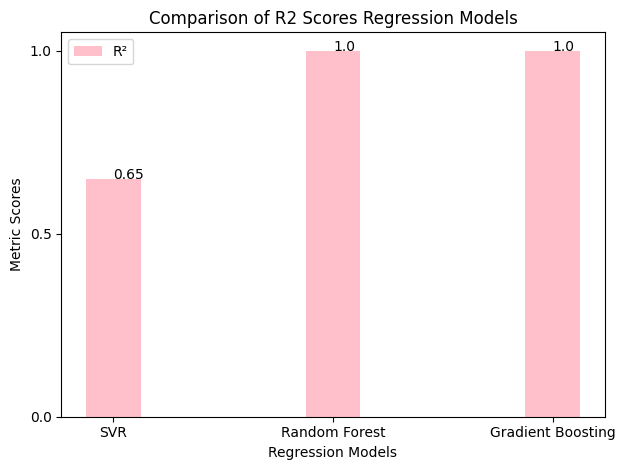

In [ ]:
plt.bar(x, r2_scores, width, label='R²', color='pink')
r2_scores = [round(r21,2),round(r22,2), round(r23,2)]

x = np.arange(len(models))  # Model indices
  # Width of each bar

addlabels(models,r2_scores)
plt.xlabel('Regression Models')
plt.ylabel('Metric Scores')
plt.title('Comparison of R2 Scores Regression Models')
plt.xticks(x, models)  # Model names on x-axis

plt.yticks(np.arange(0, 1.1, 0.5))  # Y-axis scale from 0 to 1 with 0.5 intervals
plt.legend()
# Show plot
plt.tight_layout()
plt.show()

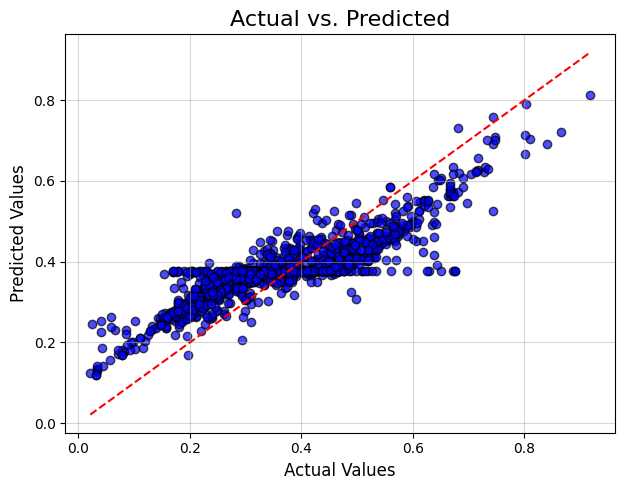

Mean Squared Error: 0.01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Example data

# Calculate residuals


# Scatter plot: Actual vs. Predicted
plt.figure(figsize=(12, 5))

# Subplot 1: Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title('Actual vs. Predicted', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(alpha=0.5)


# Show plots
plt.tight_layout()
plt.show()

# Calculate performance metric
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Battery.csv'
battery = pd.read_csv(file_path)
print(battery.head())
battery.info()


   Model year       Make           Model         Vehicle class  Motor (kW)  \
0        2017        BMW      i3 (60 Ah)            Subcompact         125   
1        2017        BMW      i3 (94 Ah)            Subcompact         125   
2        2017  Chevrolet         Bolt EV  Station wagon: Small         150   
3        2017       Ford  Focus Electric               Compact         107   
4        2017    Hyundai  IONIQ Electric              Mid-size          88   

  Transmission Fuel type  City (kWh/100 km)  Highway (kWh/100 km)  \
0           A1         B               15.2                  18.8   
1           A1         B               16.2                  19.7   
2           A1         B               16.4                  19.0   
3           A1         B               17.7                  21.8   
4           A1         B               13.7                  17.4   

   Combined (kWh/100 km)  City (Le/100 km)  Highway (Le/100 km)  \
0                   16.8               1.7       

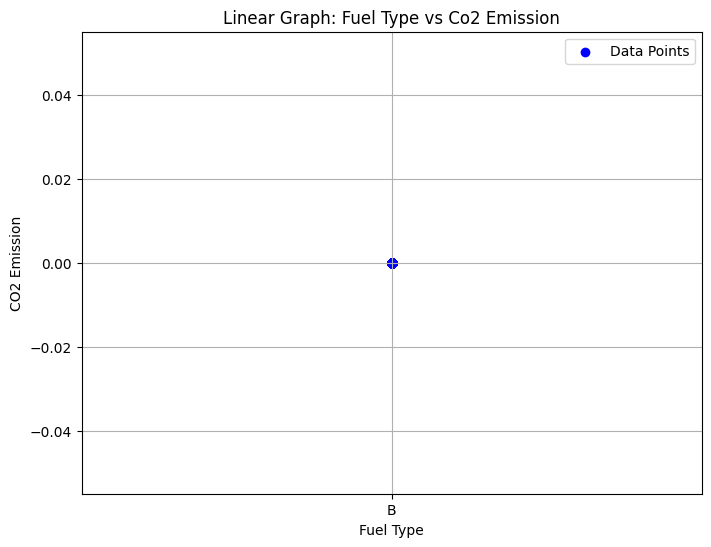

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(battery['Fuel type'], battery['CO2 emissions (g/km)'], color='blue', label='Data Points')
plt.title('Linear Graph: Fuel Type vs Co2 Emission')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emission')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Plug-in.csv'
plug = pd.read_csv(file_path)
print(plug.head())
plug.info()

   Model year  Make           Model Vehicle class  Motor (kW)  \
0        2017  Audi       A3 e-tron       Compact          80   
1        2017   BMW            330e       Compact          65   
2        2017   BMW     740e xDrive     Full-size          83   
3        2017   BMW  i3 REx (94 Ah)    Subcompact         125   
4        2017   BMW              i8    Subcompact          96   

   Engine size (L)  Cylinders Transmission Fuel type 1  \
0              1.4          4           A6        B/Z*   
1              2.0          4          AS8        B/Z*   
2              2.0          4          AS8        B/Z*   
3              0.6          2           A1           B   
4              1.5          3           A6         B/Z   

                Combined Le/100 km  Range 1 (km)  Recharge time (h)  \
0  2.8 ([25.5 kWh + 0.0 L]/100 km)            26                2.5   
1  3.3 ([29.5 kWh + 0.0 L]/100 km)            23                2.0   
2  3.6 ([32.1 kWh + 0.0 L]/100 km)            2

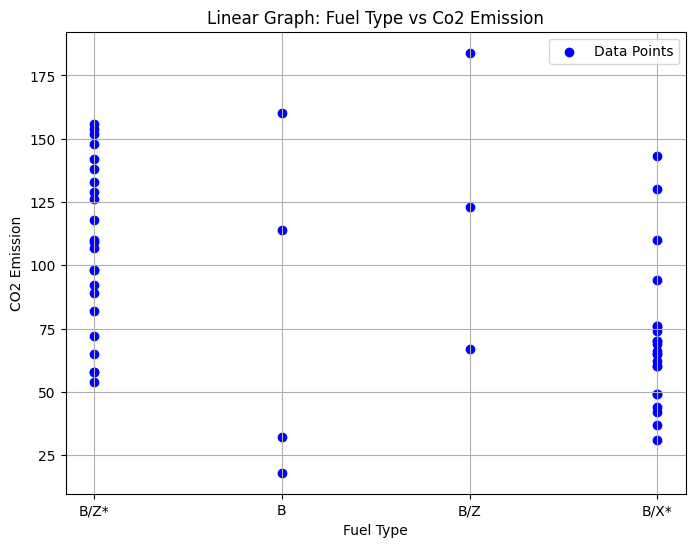

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(plug['Fuel type 1'], plug['CO2 emissions (g/km)'], color='blue', label='Data Points')
plt.title('Linear Graph: Fuel Type vs Co2 Emission')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emission')
plt.legend()
plt.grid(True)
plt.show()